In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Дисклеймер

Если кажется, что Вы выпали из повествования об основах классического машинного обучения, то эти два ноутбука проведут Вас за ручку от начала до текущего уровня, до которого мы успели дойти к концу 13-го занятия курса.

# Содержание

**А. Тренировочная задача** (этот ноутбук)<br>
1. Построим модель линейной регрессии на игрушечных данных "глазами";<br>
2. Посчитаем метрики качества модели;<br>
3. Построим модель линейной регрессии с помощью минимизации MSE;<br>
4. Посчитаем метрики качества и сравним с качеством первой модели, которую мы построили глазами.
<br><br>

**Б. Реальная задача** (второй ноутбук)<br>
1. Построим и оценим модель линейной регрессии для предсказания стоимости жилья только на числовых признаках;<br>
2. Добавим шкалирование числовых признаков и сравним метрики качества модели без шкалирования и с шкалированием;<br>
3. Добавим в лучшую из двух предыдущих моделей некоторые категориальные признаки;<br>
4. Добавим регуляризацию;<br>
5. Определим лучшие гиперпараметры с помощью K-fold кросс-валидации;<br>
6. Оценим качество на тестовой выборке.<br>
7. Попробуем логарифмировать целевую переменную, заново обучим лучшую модель и сравним качество предсказания.<br>

# A. Тренировочная задача

## 0. Данные
Ученикам седьмого "Ж" класса пришёл в голову занятный вопрос: "сколько нужно смотреть в окно, чтобы увидеть тысячу жёлтых машин?".<br>

Ребята догадались, что можно просто посмотреть в окно и засечь, за сколько минут проедет 10 жёлтых машин, а потом умножить результат на 100. Но потом им пришла более продвинутая идея: каждый будет смотреть в окно столько времени, сколько захочет, и посчитаем количество проехавших жёлтых машин. А затем они попробуют найти линейное уравнение зависимости числа проехавших машин от времени, которое ученик смотрел в окно.<br>
Как?<br>
Да просто отметят точки на графике, возьмут линейку, приложат её наиболее удачным образом. Всё, уравнение готово.

Попробуем сделать то же самое :)

### 0.1
* Прочитайте данные из `data/task1.tsv` (разделитель -- знак табуляции).<br>

Аннотация стольцов:<br>
**x** -- время, в течение которого ученик смотрел в окно и считал машины;<br>
**target** -- число проехавших жёлтых машин за **x** минут.<br>

* Выведите первые 5 строк прочитанной таблицы.

In [ ]:
# ваш код

,x,target
0,4.4,5
1,4.3,20
2,5.6,14
3,2.2,2
4,6.9,20


### 0.2
* Переимунуйте колонку **x** в **time**.<br>
Убедитесь, что колонка была успешно переименована (посмотрите содержимое атрибута `columns`).

In [ ]:
# ваш код

Index(['time', 'target'], dtype='object')

### 0.3
* Визуализируйте на графике зависимость числа проехавших машин от времени.<br>
* Используйте `plt.scatter` или `seaborn.scatterplot`.<br>
* Подпишите оси (xlabel, ylabel), добавьте название для графика (title).<br>
<br>
*Чтобы увеличить размер картинки, воспользуйтесь `plt.figure(figsize=(10, 6), dpi=100)`. Размеры figsize и dpi можно менять.*

In [ ]:
# ваш код

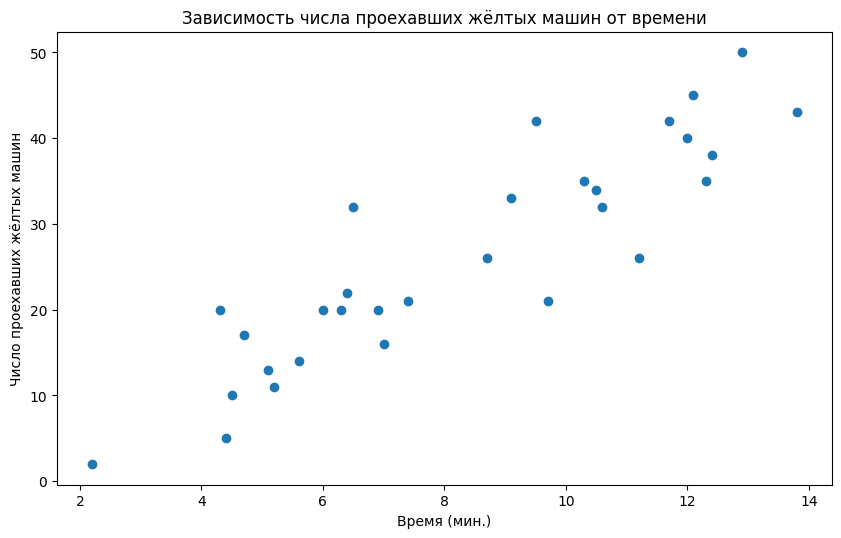

### 0.4
На первый взгляд кажется, что сюда можно "впихнуть" линейную модель уже на глаз.<br>
То есть нам нужно на глаз подобрать угол наклона (**m**) и свободный член (**c**) в уравнении $ y = m\cdot x + c $, где **y** -- машины, **x** -- время в минутах.<br>

* Нарисуйте ту же картинку, что в пункте 0.3, но добавьте сетку (grid), чтобы было удобнее определять угол наклона;<br>
* Сделайте непрозрачность сетки 0.5 (alpha);<br>
* Установите ноль в качестве начала оси игрек (`plt.ylim`), чтобы было удобнее определить свободный член (координата, в которой прямая пересекает ось абсцисс, равна свободному члену);<br>
* По желанию можете поменять границы оси абсцисс (`plt.xlim`), а также подписи (`plt.xticks`, `plt.yticks`).

In [ ]:
# ваш код

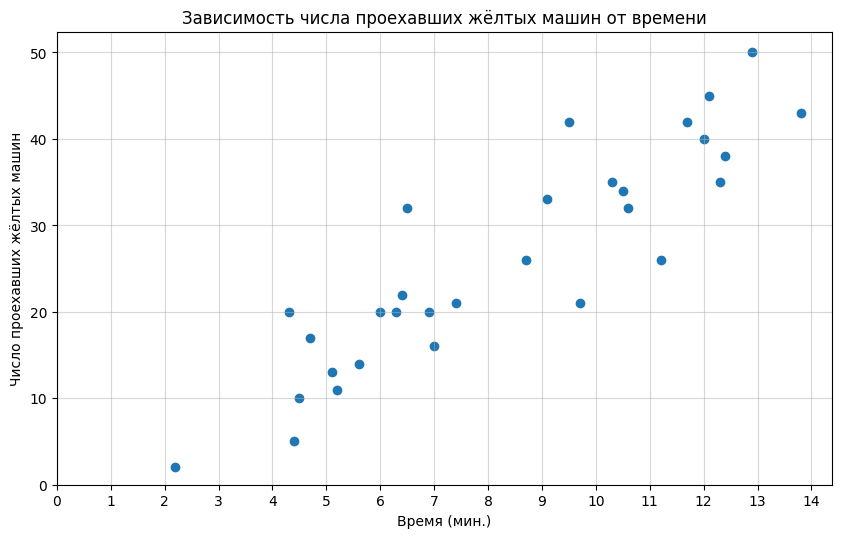

## 1. Построим модель линейной регресси на глаз.

### 1.1
Если всё сделано правильно, то сейчас есть картинка с сеткой, по которой мы попробуем составить уравнение линейной зависимости числа проехавших желтых машин от времени, в течение которого ученик смотрел в окно.

* Посмотрите на график и предположите значение угла наклона (**m**) и свободного члена (**c**) в уравнении $ y = m\cdot x + c $, где **y** -- машины, **x** -- время в минутах.

Как оценить параметры?<br>
* **m** -- то, на скольк изменяется игрек за 1 шаг по иксу. То есть на сколько машин больше уведит ученик, если будет смотреть 1 минуту;<br>
* **c** -- пересечение прямой с осью игрек. Здравый смысл подсказывает, что в теории мы должны видеть 0 жёлтых машин, если смотрим в окно 0 минут :)

### 1.2 
Теперь нам надо добавить линейную модель, которую вы оценили на глаз, на график.


* Получите значение вашей линейной модели в точках 0 и 14 (то есть для икс координат 0 и 14)<br>
(например, если вы решили, что $m=10$, а $c=1$, то если функции дать $14$, то она вернет $10*14+1=141$, так как $ y = 10\cdot x + 1$);<br>
* Постройте график из пункта 0.4 и добавьте на него прямую (постройте её по двум точкам с помощью `plt.plot`).

In [ ]:
# ваш код

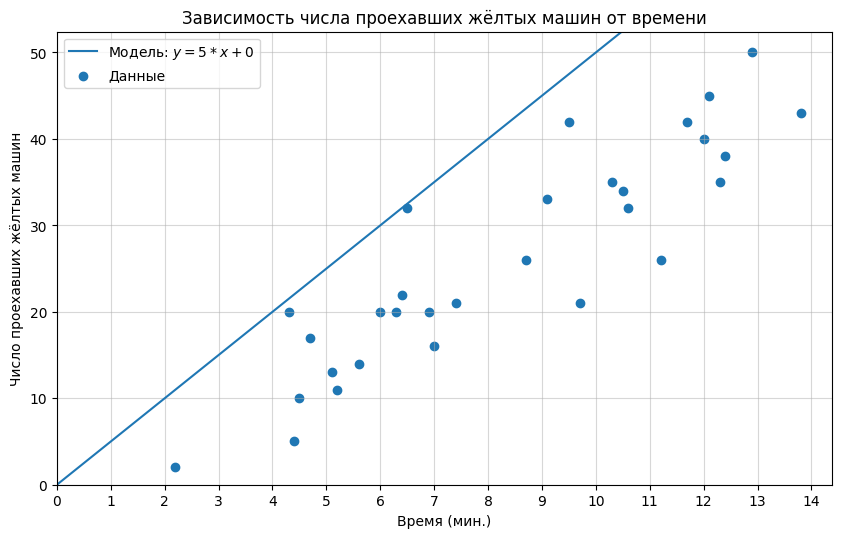

### 1.3
У меня с первого раза совсем криво получилось определить параметры. У Вас, возможно, тоже ...)<br>
Попробуйте поменять значения $m$ и $c$ и добиться "лучшей" прямой, которая бы хорошо ложилась на данные.

In [ ]:
# ваш код

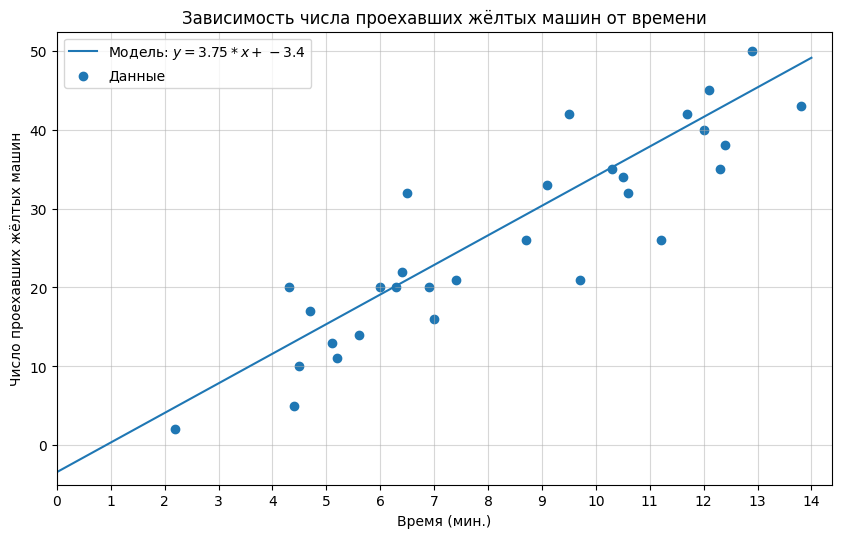

Мне показалось, что прямая с параметрами $ m = 3.75 $ и $ c = -3.4 $ неплохо "ложится" на данные. Я оценю качество для неё<br>
Вы воспользуйтесь теми $m$ и $c$, которые показались наиболее удачными именно Вам. Сейчас сравним, у кого получилось лучшее качество :)

## 2. Оценка качество модели, построенной на глаз.

### 2.1 
Создайте новый столбец в исходном датафрейме `prediction_dumb`, в который получите для каждого значения `time` предсказание числа проехавших жёлтых машин по формуле, которую Вы предположили выше.

In [ ]:
# ваш код

,time,target,prediction_dumb
0,4.4,5,13.100
1,4.3,20,12.725
2,5.6,14,17.600
3,2.2,2,4.850
4,6.9,20,22.475


### 2.2 
Посчитаем среднеквадратичную оценку курами. Потом сравним поулченное значение с реализацией формулы из scikit-learn.<br>
* Вычтите из предсказания истинное значение (можно и наоборот);<br>
* Возведите все разницы в квадрат;<br>
* Найдите среднее значение квадрата<br>

In [ ]:
# ваш код

32.37427083333334

### 2.3
* Импортируйте функцию для подсчета среднеквадратичной ошибки (`mean_squared_error`) из `sklearn.metrics`;<br>
* Посчитайте значение MSE с помощью функции из sklearn;<br>
* Совпадает ли значение с посчитанным вручную? (должно совпадать идеяльно до любого знака).

In [11]:
# ваш код

32.37427083333334

### 2.4
Посчитаем коэффициент детерминации, или $R^2$.<br>
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y^i - y_{pred}^i)^2}{\sum_{i=1}^{n} (y^i - y_{mean})^2}$$

Коэффициент детерминации говорит, какую долю дисперсии наша модель описывает.<br>
Или можно сказать, что $R^2$ говорит об отношении ошибок нашей модели к модели, которая бы просто предсказывала среднее число. Например $R^2=0.5$ говорит, что ошибка нашей модели в 2 раза меньше, чем ошибка модели, которая предсказывает среднее. А $R^2=0.75$ говорит, что размер ошибки в 4 раза меньше.

* Посчитайте разницу предсказанного значения и истинного числа проехавших машин. Возведите разницы в квадрат. Найдите сумму. Это числитель дроби. Сохраните в переменную;
* Посчитайте разницу истинных значений и среднего числа проехавших машин. Возведите разницы в квадрат. Найдите сумму. Это знаменатель дроби. Сохраните в переменную;
* Разделите числитель на знаменатель и вычтите частное из единицы.

In [ ]:
# ваш код

0.7900576881507367

### 2.5
* Импортируйте функцию для подсчёта коэффициента детерминации (`r2_score`) из `sklearn.metrics`;<br>
* Посчитайте $R^2$ с помощью реализации из sklearn и сравните со значением, посчитанным руками. Они должны идеально совпадать.

In [14]:
# ваш код

0.7900576881507367

## 3. Линейная регрессия из scikit-learn
Основной класс объектом из scikit-learn -- estimator (то есть модели).<br>
У моделей два основных метода: `fit` для обучения и `predict` для получения предсказаний.<br>

### 3.1
* Импортируйте модель линейной регерссии (`LinearRegression`) из `sklearn.linear_model`. Это реализация решения задачи линейой регресиии методом наименьшим квадратов (то есть строится такая прямая, которая минимизирует MSE);<br>
* Создайте экземпляр класса линейной регрессии;<br>
* Обучите модель (признак -- время, целевое значение -- число машин);<br>
(нужно превратить признаки в таблицу. Так как мы используем всего 1 столбец, то надо воспользоваться методом `to_frame()` или `reshape`. Например `df['time'].to_frame()`.)<br>
* Получите предсказания модели для каждого времени из столбца time и сохраните полученные значения в новый столбец `prediction_sklearn`.

In [16]:
# ваш код

### 3.2
В атрибутах `coef_` и `intercept_` находятся угол наклона и свободный член соответственно. 

На одном графике изобразите:<br>
* Исходные данные;
* Первую модель, полученную на глаз;
* Модель, построенную с sklearn (то есть по формуле посчитайте значение в точке 0 и 14 таким же образом, как и ранее, но используйте параметры модели, обученной с помощью sklearn).

In [ ]:
# ваш код

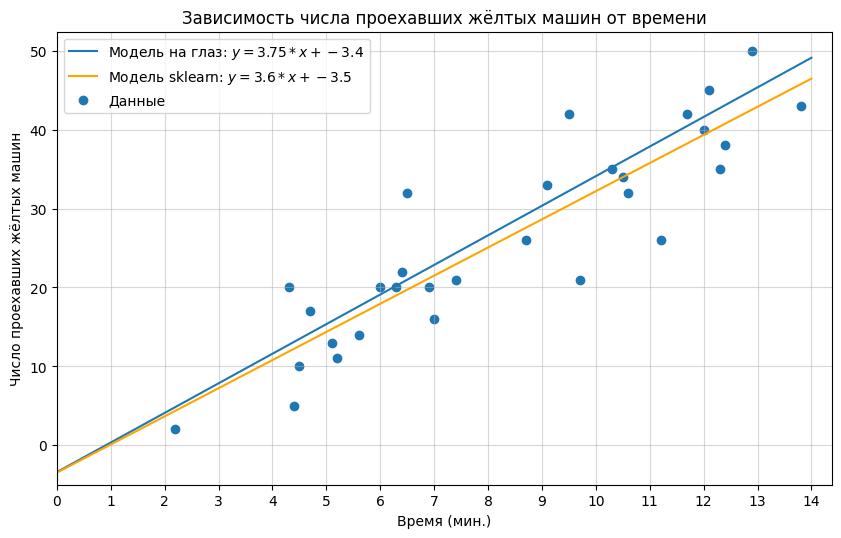

В моём случае получилось неплохо подобрать оптимальные значения на глаз. И угол наклона, и свободный член отличаются не очень сильно от значений, которые минимизируют MSE. 

## 4.
### 4.1
* С помощью реализации из sklearn посчитайте MSE и $R^2$ для предсказаний модели из sklearn (мы сохранили их в столбец `prediction_sklearn`).

In [ ]:
# ваш код

29.495660538328444

0.8087250460460742

### 4.2 
На сколько процентов уменьшилась ошибка и увеличился $R^2$ ?

In [ ]:
# ваш код

Уменьшение ошибки (%)


-9.76

In [ ]:
# ваш код

Увеличение  $R^2$ (%)


2.31